In [3]:
!pip install tensorflow

  Using cached wheel-0.44.0-py3-none-any.whl.metadata (2.3 kB)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB ? eta 0:00:00
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.3 MB 6.4 MB/s eta 0:01:01
   ---------------------------------------- 1.0/390.3 MB 6.7 MB/s eta 0:00:58
   ---------------------------------------- 1.5/390.3 MB 7.7 MB/s eta 0:00:51
   ---------------------------------------- 2.2/390.3 MB 7.9 MB/s eta 0:00:49
   ---------------------------------------- 3.0/390.3 MB 8.4 MB/s eta 0:00:46
   ---------------------------------------- 3.6/390.3 MB 8.9 MB/s eta 0:00:44
   ---------------------------------------- 4.6/390.3 MB 9.2 MB/s eta 0:00:42
    --------------------------------------- 5.3/390.3 MB 9.3 MB/s eta 0:00:42
    ------------------------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   - -------------------------------------- 16.3/390.3 MB 10.9 MB/s eta 0:00:35
   - -------------------------------------- 16.9/390.3 MB 10.9 MB/s eta 0:00:35
   - -------------------------------------- 17.7/390.3 MB 11.1 MB/s eta 0:00:34
   - -------------------------------------- 18.3/390.3 MB 11.3 MB/s eta 0:00:33
   - -------------------------------------- 18.8/390.3 MB 10.9 MB/s eta 0:00:35
   - -------------------------------------- 19.4/390.3 MB 11.1 MB/s eta 0:00:34
   -- ------------------------------------- 19.9/390.3 MB 11.1 MB/s eta 0:00:34
   -- ------------------------------------- 20.5/390.3 MB 11.1 MB/s eta 0:00:34
   -- ------------------------------------- 21.1/390.3 MB 11.3 MB/s eta 0:00:33
   -- ------------------------------------- 21.9/390.3 MB 11.1 MB/s eta 0:00:34
   -- ------------------------------------- 22.5/390.3 MB 11.1 MB/s eta 0:00:34
   -- ------------------------------------- 23.1/390.3 MB 11.3 MB/s eta 0:00:33
   -- ---------------------------------

# Importando as bibliotecas necessárias

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Carregamento dos Dados Pré-processados

In [6]:
# Carregando os dados pré-processados
processed_data_path = '../data/processed/normalized_stock_data.csv'
df = pd.read_csv(processed_data_path, index_col=0)

# Ordenando os dados por data
df = df.sort_values('Date')

# Divisão dos Dados em Treino e Teste

In [7]:
# Dividindo os dados em treino e teste
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Preparação dos Dados para o Modelo LSTM

In [8]:
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60

In [9]:
# Preparando os dados de treino
train_data_values = train_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values
X_train, y_train = create_sequences(train_data_values, time_step)

# Preparando os dados de teste
test_data_values = test_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values
X_test, y_test = create_sequences(test_data_values, time_step)

# Construção do Modelo LSTM

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 6)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Resumo do modelo
model.summary()

c:\Users\miche\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,901 (128.52 KB)

 Trainable params: 32,901 (128.52 KB)

 Non-trainable params: 0 (0.00 B)

# Treinamento do Modelo

In [20]:
# Treinando o modelo e capturando o histórico de perda
history = model.fit(X_train, y_train, batch_size=1, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
12590/12590 ━━━━━━━━━━━━━━━━━━━━ 274s 22ms/step - loss: 1.1231e-05 - val_loss: 4.8875e-04
Epoch 2/10
12590/12590 ━━━━━━━━━━━━━━━━━━━━ 276s 22ms/step - loss: 9.5754e-06 - val_loss: 7.8168e-05
Epoch 3/10
12590/12590 ━━━━━━━━━━━━━━━━━━━━ 319s 25ms/step - loss: 8.6119e-06 - val_loss: 4.9479e-05
Epoch 4/10
12590/12590 ━━━━━━━━━━━━━━━━━━━━ 527s 42ms/step - loss: 9.4221e-06 - val_loss: 1.1339e-04
Epoch 5/10
12590/12590 ━━━━━━━━━━━━━━━━━━━━ 558s 44ms/step - loss: 7.9824e-06 - val_loss: 0.0010
Epoch 6/10
12590/12590 ━━━━━━━━━━━━━━━━━━━━ 506s 40ms/step - loss: 8.6416e-06 - val_loss: 6.9690e-05
Epoch 7/10
12590/12590 ━━━━━━━━━━━━━━━━━━━━ 496s 39ms/step - loss: 7.3488e-06 - val_loss: 9.4131e-05
Epoch 8/10
12590/12590 ━━━━━━━━━━━━━━━━━━━━ 510s 40ms/step - loss: 7.5359e-06 - val_loss: 2.2442e-04
Epoch 9/10
12590/12590 ━━━━━━━━━━━━━━━━━━━━ 498s 40ms/step - loss: 7.4760e-06 - val_loss: 1.6272e-04
Epoch 10/10
12590/12590 ━━━━━━━━━━━━━━━━━━━━ 498s 40ms/step - loss: 7.5569e-06 - val_loss: 2.01

# Perda durante o treinamento

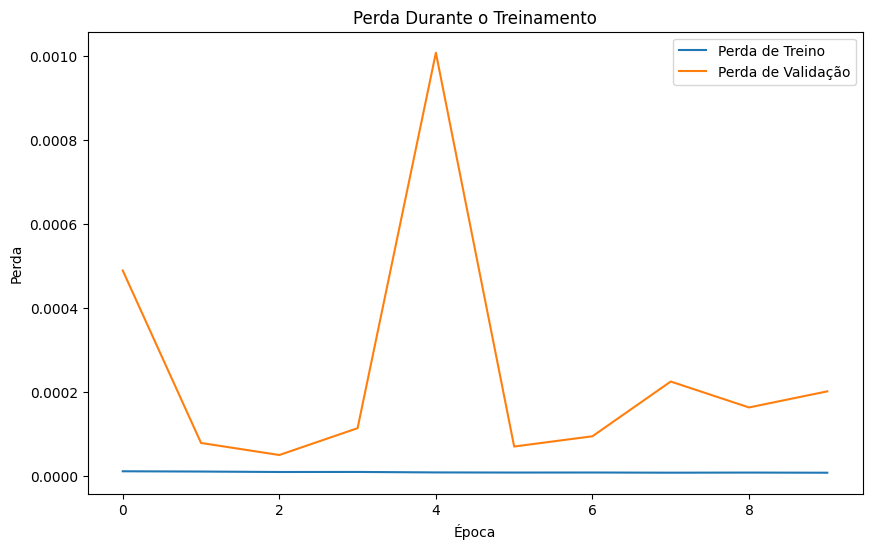

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Perda Durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()

# Avaliação do Modelo

In [22]:
# Fazendo previsões com o modelo treinado
predictions = model.predict(X_test)

97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step


In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df[['Close']])
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [24]:
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

MAE: 0.009509149579090652
RMSE: 0.014179612167672067
MAPE: 1.249907096030167%


# Salvando o modelo

In [25]:
model_save_path = '../saved_models/lstm_stock_prediction_model.h5'
model.save(model_save_path)

# Vizualizando as previsões